In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
import tarfile
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import json
import sys
import numpy as np
from collections import Counter, defaultdict
import gc
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
sys.path.append('/content/drive/MyDrive/ADA/src')

In [101]:
from booknlp.character import CharacterDataset, Character, GENDER_DICT

# 2 Plot Analysis

We used the BookNLP library to extract NER and coreference data. Due to the time required to analyze all 43,000 plots, this report focuses on a sample of 500 plots. The full dataset will be included in the final report.

## 2.1 Gender Count in Plot
We examined the number of characters in each plot by gender and analyzed the frequency of mentions per character, also categorized by gender.

In [6]:
processed_path = Path('/content/drive/MyDrive/ADA/data/processed/')
plot_path_list = sorted(list(processed_path.glob('*')))[:500]

In [7]:
gender_count = []
gender_ratio = []
gender_sum_mention = []
gender_ratio_mention = []

for plot_path in tqdm(plot_path_list):
  data = CharacterDataset(plot_path)
  gender_count.append(data.gender_count)
  gender_ratio.append(data.gender_ratio)
  gender_sum_mention.append(data.gender_sum_mention)
  gender_ratio_mention.append(data.gender_ratio_mention)
  del data
  gc.collect()

100%|██████████| 500/500 [05:11<00:00,  1.61it/s]


In [64]:
gender_count_df = pd.DataFrame(gender_count)
gender_ratio_df = pd.DataFrame(gender_ratio)
gender_sum_mention_df = pd.DataFrame(gender_sum_mention)
gender_ratio_mention_df = pd.DataFrame(gender_ratio_mention)

In [69]:
gender_count_df.fillna(0, inplace=True)
gender_ratio_df.fillna(0, inplace=True)
gender_sum_mention_df.fillna(0, inplace=True)
gender_ratio_mention_df.fillna(0, inplace=True)

### Insights on Gender
- Male characters appear most frequently, with an average count of 2.81 per entry and an average ratio of 0.45, indicating that male characters are more dominant across entries.
- Male character counts have the highest variability (range 1–14), suggesting diverse representation, while female and plural characters tend to appear less frequently and more consistently.

In [72]:
print("Gender Count Summary Statistics:\n", gender_count_df.describe())
print("\nGender Ratio Summary Statistics:\n", gender_ratio_df.describe())

Gender Count Summary Statistics:
            plural      female       male     unknown
count  500.000000  500.000000  500.00000  500.000000
mean     1.458000    1.488000    2.81600    0.736000
std      1.983963    1.638054    2.59685    1.263922
min      0.000000    0.000000    0.00000    0.000000
25%      0.000000    0.000000    1.00000    0.000000
50%      1.000000    1.000000    2.00000    0.000000
75%      2.000000    2.000000    4.00000    1.000000
max     15.000000   10.000000   14.00000    9.000000

Gender Ratio Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     0.189820    0.235771    0.450046    0.080363
std      0.228186    0.236059    0.294852    0.125965
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.272727    0.000000
50%      0.142857    0.200000    0.458042    0.000000
75%      0.333333    0.385684    0.600000    0.142857
max      1.000000    1

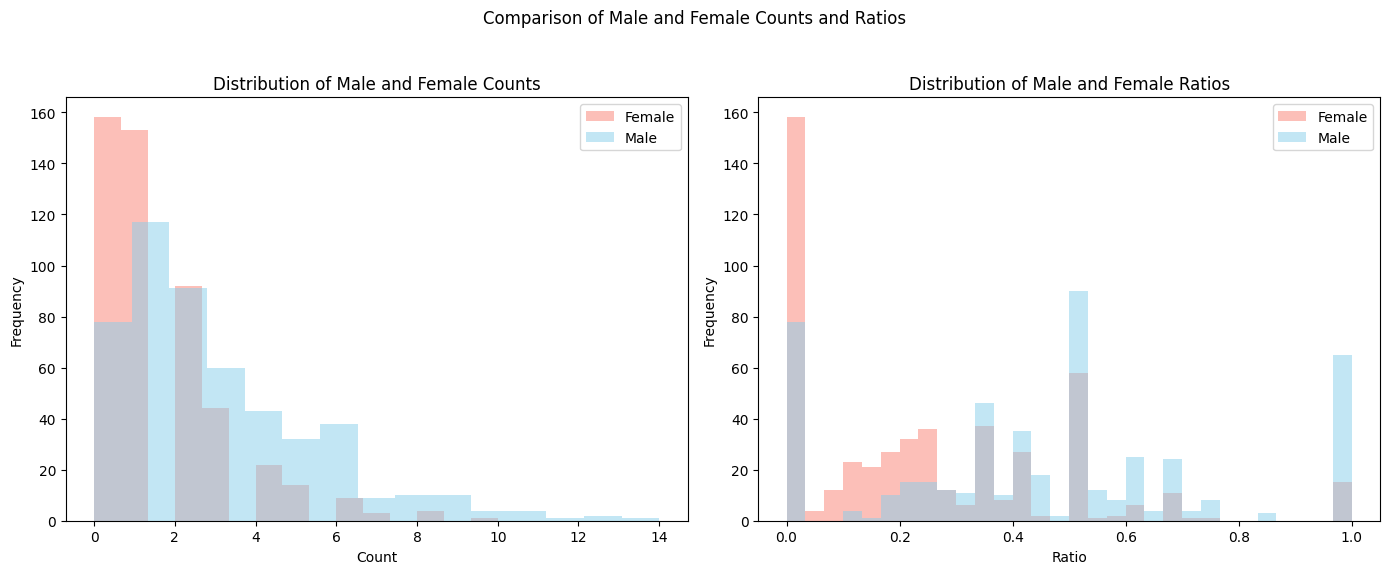

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Counts and Ratios")

# 1. Overlaid Histograms for Counts
axes[0].hist(gender_count_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_count_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Counts")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# 2. Overlaid Histograms for Ratios
axes[1].hist(gender_ratio_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratios")
axes[1].set_xlabel("Ratio")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Insights on Gender Mentions
- Male characters have the highest total (26.42) and average mentions per character (7.37), suggesting a stronger narrative focus on male characters.
- Female characters have lower total and average mentions (11.81 total; 4.96 average), indicating a possible gender disparity in narrative attention.

In [76]:
print("\nGender Sum Mention Summary Statistics:\n", gender_sum_mention_df.describe())
print("\nGender Ratio Mention Summary Statistics:\n", gender_ratio_mention_df.describe())


Gender Sum Mention Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     5.550000   11.810000   26.426000    1.772000
std      9.674021   19.850895   35.294134    3.239909
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    4.000000    0.000000
50%      2.000000    5.000000   12.000000    0.000000
75%      7.000000   14.000000   36.000000    2.000000
max    116.000000  172.000000  230.000000   26.000000

Gender Ratio Mention Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     2.054289    4.962940    7.369490    0.936137
std      2.628083    6.216373    7.337663    1.228779
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    3.000000    0.000000
50%      2.000000    3.000000    5.333333    0.000000
75%      3.000000    7.000000    9.762500    2.00000

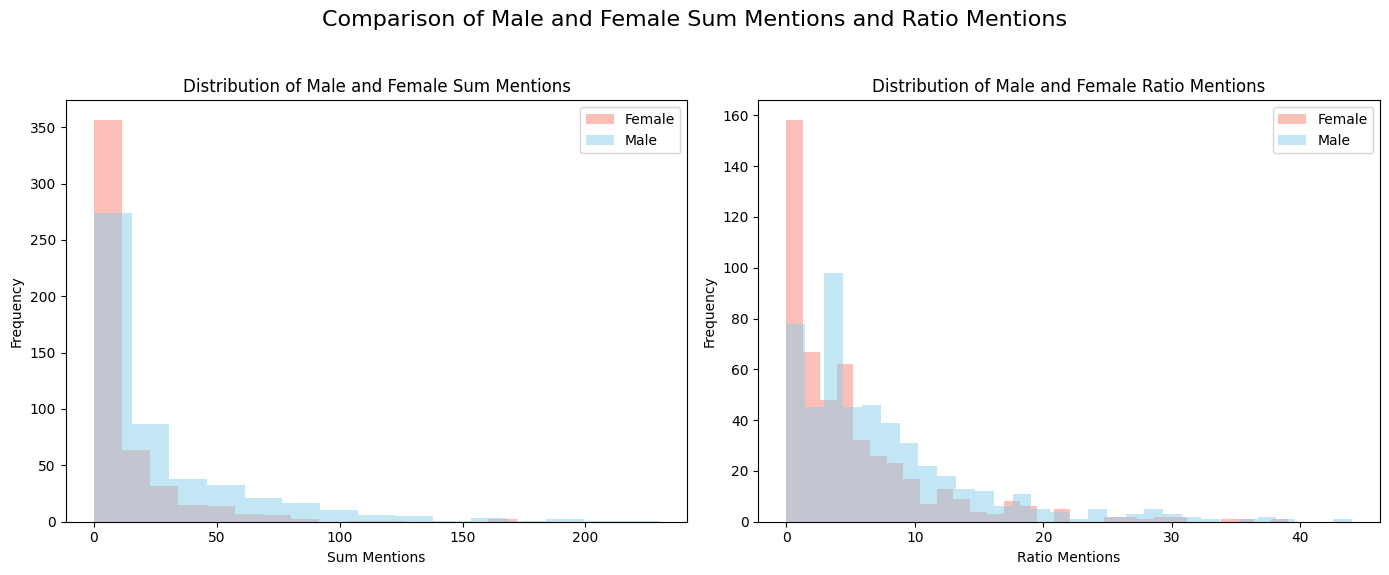

In [93]:
# Plotting male and female comparisons for Sum Mentions and Ratio Mentions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Sum Mentions and Ratio Mentions", fontsize=16)

# 1. Overlaid Histogram for Sum Mentions
axes[0].hist(gender_sum_mention_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_sum_mention_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Sum Mentions")
axes[0].set_xlabel("Sum Mentions")
axes[0].set_ylabel("Frequency")
axes[0].legend(loc='upper right')

# 2. Overlaid Histogram for Ratio Mentions
axes[1].hist(gender_ratio_mention_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_mention_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratio Mentions")
axes[1].set_xlabel("Ratio Mentions")
axes[1].set_ylabel("Frequency")
axes[1].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2.2 Related Event Analysis

In [ ]:
from src.booknlp.event import EventDataset

In [113]:
#from src.booknlp.character import CharacterDataset, GENDER_DICT
from pathlib import Path
from collections import defaultdict, Counter
from functools import cached_property
import pandas as pd

import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

class EventDataset(CharacterDataset):
    """
    A dataset class to analyze events associated with characters by gender.
    Events are categorized into agent, patient, and possessor roles.
    """

    def __init__(self, dir: Path):
        """
        Initializes the EventDataset, building event lists for each character
        categorized by gender.

        Parameters:
            dir (Path): The directory path to the dataset files.
        """
        super().__init__(dir)
        self.lemmatizer = WordNetLemmatizer()
        self.agent_events = defaultdict(list)
        self.patient_events = defaultdict(list)
        self.poss_events = defaultdict(list)
        self._build()

    def _preprocess(self, verbs):
        """
        Preprocesses a list of verbs by converting to lowercase and lemmatizing.
        """
        return [self.lemmatizer.lemmatize(verb.lower(), wordnet.VERB) for verb in verbs]

    def _build(self):
        """
        Builds the event datasets by collecting verbs from each character's actions
        categorized as agent, patient, or possessor, and processes them by gender.
        """
        # Collect verbs by gender
        for ch in self.characters:
            self.agent_events[ch.gender].extend(self._preprocess(ch.agent_word))
            self.patient_events[ch.gender].extend(self._preprocess(ch.patient_word))
            self.poss_events[ch.gender].extend(self._preprocess(ch.poss_word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [114]:
female_agent_events = []
male_agent_events = []
female_patient_events = []
male_patient_events = []
female_poss_events = []
male_poss_events = []

for plot_path in tqdm(plot_path_list):
  data = EventDataset(plot_path)
  female_agent_events.extend(data.agent_events['female'])
  male_agent_events.extend(data.agent_events['male'])
  female_patient_events.extend(data.patient_events['female'])
  male_patient_events.extend(data.patient_events['male'])
  female_poss_events.extend(data.poss_events['female'])
  male_poss_events.extend(data.poss_events['male'])
  del data
  gc.collect()

100%|██████████| 500/500 [02:19<00:00,  3.59it/s]


In [121]:
male_text = ' '.join(male_agent_events)
female_text = ' '.join(female_poss_events)

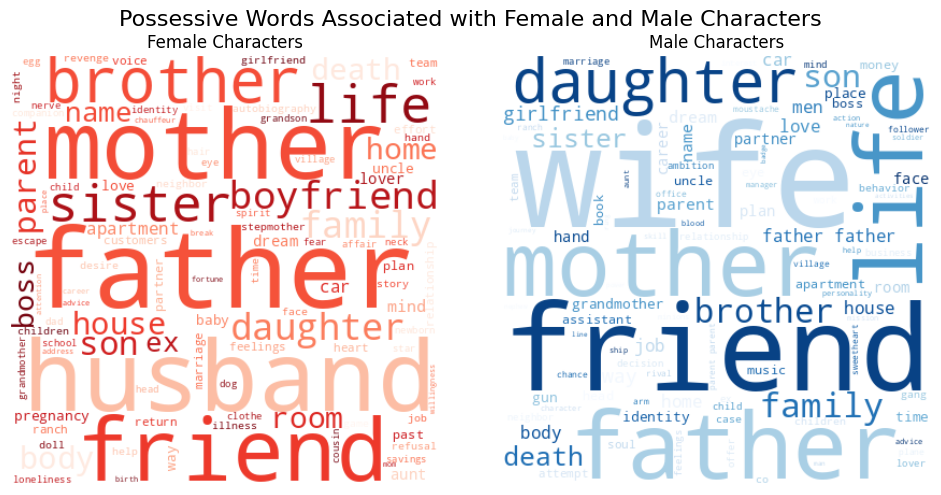

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up the word clouds with shared settings for consistency
wordcloud_female = WordCloud(width=400, height=400, background_color='white', colormap='Reds', max_words=100).generate(female_text)
wordcloud_male = WordCloud(width=400, height=400, background_color='white', colormap='Blues', max_words=100).generate(male_text)

# Display the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Possessive Words Associated with Female and Male Characters", fontsize=16)

# Female verbs word cloud
axes[0].imshow(wordcloud_female, interpolation='bilinear')
axes[0].set_title("Female Characters")
axes[0].axis('off')

# Male verbs word cloud
axes[1].imshow(wordcloud_male, interpolation='bilinear')
axes[1].set_title("Male Characters")
axes[1].axis('off')

plt.tight_layout()
plt.show()